<a href="https://colab.research.google.com/github/Enovak001/SpaceJamTitanic/blob/main/SpaceJamTitanic_CustomTensorFlowTrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import models from SciKit-Learn (sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Import Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics

# To be able to view an image
from IPython.display import Image
import numpy as np

### Data description:

`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.

`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

`Destination` - The planet the passenger will be debarking to.

`Age` - The age of the passenger.

`VIP` - Whether the passenger has paid for special VIP service during the voyage.

`RoomService, FoodCourt, ShoppingMall, Spa, VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

`Name` - The first and last names of the passenger.

`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [2]:
# Getting train data
test_list = pd.read_csv('/content/drive/MyDrive/Spaceship_Titanic_binary_class/test.csv')
print(test_list.describe())
print(test_list.head())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.179072    607.011289   1527.663045    560.821123   1117.186015   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      26.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     53.000000     78.000000     33.000000     50.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  
count   4197.000000  
mean     310.710031  
std     1246.994742  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       36.000000  
max    22272.000000  
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth    

In [3]:
# Getting test data
train_list = pd.read_csv('/content/drive/MyDrive/Spaceship_Titanic_binary_class/train.csv')
print(train_list.describe())
print(train_list.head())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa    

In [4]:
raw_train_df=pd.DataFrame(train_list, index=None)
raw_train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
raw_train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
# make a copy of dataframe... otherwise we mess also raw_train_df
df_temp = raw_train_df.copy()
df_temp

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Train data Feature engineering

In [8]:
train_pass_id = raw_train_df.PassengerId
train_pass_id

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [9]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [10]:
# This will turn all string value into categories
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype('category').cat.as_ordered()

In [11]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   category
 1   HomePlanet    8492 non-null   category
 2   CryoSleep     8476 non-null   category
 3   Cabin         8494 non-null   category
 4   Destination   8511 non-null   category
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   category
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   category
 13  Transported   8693 non-null   bool    
dtypes: bool(1), category(7), float64(6)
memory usage: 1.4 MB


In [12]:
df_temp.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
df_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Filling in missing numerical features with `median` value

In [14]:
# This will list all numeric columns
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [15]:
# Check for which numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [16]:
# Fill numeric columns with median value
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
          # Add a binary column which tells us if the data was missing or not
          df_temp[label+'_is_missing'] = pd.isnull(content)
          # Fill missing numeric valeus with median
          fill_in_median = content.fillna(content.median())
          df_temp[label] = fill_in_median

In [17]:
# Check for more numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [18]:
# Check to see how many examples were missing

df_temp.ShoppingMall.value_counts()

0.0       5795
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1115, dtype: int64

In [19]:
df_temp.isna().sum()

PassengerId                  0
HomePlanet                 201
CryoSleep                  217
Cabin                      199
Destination                182
Age                          0
VIP                        203
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Name                       200
Transported                  0
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
dtype: int64

### Filling in missing categorical features with corresponding values

In [20]:
# check for columns that are not numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [21]:
df_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_is_missing,RoomService_is_missing,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,False,False,False,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,False,False,False,False,False,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,False,False,False,False,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,False,False,False,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,False,False,False,False,False,False


#### Data description:

`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [22]:
# Separating features with known input format to multiple features (later of numerical type)
df_temp[["Cabin_deck","Cabin_no.","Cabin_side"]]=df_temp["Cabin"].str.split("/",expand=True)
df_temp.drop(columns=["Cabin"],inplace=True)

df_temp[["firstname","last_name"]]=df_temp["Name"].str.split(" ",expand=True)
df_temp.drop(columns=["Name"],inplace=True)

df_temp[["PassengerId_group","PassenngerId_no"]]=df_temp["PassengerId"].str.split("_",expand=True).astype('int')
df_temp.drop(columns=["PassengerId"],inplace=True)   # -> we have train_pass_id

In [23]:
train_pass_id

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [24]:
df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,Cabin_deck,Cabin_no.,Cabin_side,firstname,last_name,PassengerId_group,PassenngerId_no
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,False,False,False,B,0,P,Maham,Ofracculy,1,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,False,False,False,F,0,S,Juanna,Vines,2,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,False,False,False,A,0,S,Altark,Susent,3,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,False,False,False,A,0,S,Solam,Susent,3,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,False,False,False,F,1,S,Willy,Santantines,4,1


In [25]:
# check for columns that are not numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

HomePlanet
CryoSleep
Destination
VIP
Cabin_deck
Cabin_no.
Cabin_side
firstname
last_name


In [26]:
df_temp.isna().sum()

HomePlanet                 201
CryoSleep                  217
Destination                182
Age                          0
VIP                        203
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
Cabin_deck                 199
Cabin_no.                  199
Cabin_side                 199
firstname                  200
last_name                  200
PassengerId_group            0
PassenngerId_no              0
dtype: int64

In [27]:
# Turn categorical variables into numbers and fill missing
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate weather sample has a missing value
        df_temp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_temp[label] = pd.Categorical(content).codes +1

In [28]:
# Check for more categorical columns have null values
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [29]:
df_temp.isna().sum()

HomePlanet                 0
CryoSleep                  0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Transported                0
Age_is_missing             0
RoomService_is_missing     0
FoodCourt_is_missing       0
ShoppingMall_is_missing    0
Spa_is_missing             0
VRDeck_is_missing          0
Cabin_deck                 0
Cabin_no.                  0
Cabin_side                 0
firstname                  0
last_name                  0
PassengerId_group          0
PassenngerId_no            0
HomePlanet_is_missing      0
CryoSleep_is_missing       0
Destination_is_missing     0
VIP_is_missing             0
Cabin_deck_is_missing      0
Cabin_no._is_missing       0
Cabin_side_is_missing      0
firstname_is_missing       0
last_name_is_missing       0
dtype: int64

In [30]:
df_temp.Transported.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [31]:
df_temp['Transported'] = df_temp['Transported'].astype('int8')

In [32]:
df_temp.Transported.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int8

In [33]:
df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,PassenngerId_no,HomePlanet_is_missing,CryoSleep_is_missing,Destination_is_missing,VIP_is_missing,Cabin_deck_is_missing,Cabin_no._is_missing,Cabin_side_is_missing,firstname_is_missing,last_name_is_missing
0,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,...,1,False,False,False,False,False,False,False,False,False
1,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,...,1,False,False,False,False,False,False,False,False,False
2,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,...,1,False,False,False,False,False,False,False,False,False
3,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,...,2,False,False,False,False,False,False,False,False,False
4,1,1,3,16.0,1,303.0,70.0,151.0,565.0,2.0,...,1,False,False,False,False,False,False,False,False,False


In [89]:
X = df_temp.drop('Transported', axis=1)
y = df_temp.Transported

In [35]:
# #split the data into train and test sets

# np.random.seed(42)

# X_train = X.iloc[:int(len(X) * 0.8), :]
# X_val = X.iloc[int(len(X) * 0.8):, :]
# y_train = y.iloc[:int(len(y) * 0.8)]
# y_val = y.iloc[int(len(y) * 0.8):]

In [90]:
test_df=pd.DataFrame(test_list, index=None)

In [91]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [47]:
test_df_temp = test_df.copy()

## Test data Feature engineering

In [48]:
test_pass_id = test_df_temp.PassengerId
test_pass_id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [49]:
for label, content in test_df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [50]:
# This will turn all string value into categories
for label, content in test_df_temp.items():
    if pd.api.types.is_string_dtype(content):
        test_df_temp[label]=content.astype('category').cat.as_ordered()

In [51]:
test_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   4277 non-null   category
 1   HomePlanet    4190 non-null   category
 2   CryoSleep     4184 non-null   category
 3   Cabin         4177 non-null   category
 4   Destination   4185 non-null   category
 5   Age           4186 non-null   float64 
 6   VIP           4184 non-null   category
 7   RoomService   4195 non-null   float64 
 8   FoodCourt     4171 non-null   float64 
 9   ShoppingMall  4179 non-null   float64 
 10  Spa           4176 non-null   float64 
 11  VRDeck        4197 non-null   float64 
 12  Name          4183 non-null   category
dtypes: category(7), float64(6)
memory usage: 721.5 KB


In [52]:
test_df_temp.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [53]:
test_df_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Filling in missing numerical features with `median` value

In [54]:
test_df_temp[["Cabin_deck","Cabin_no.","Cabin_side"]]=test_df_temp["Cabin"].str.split("/",expand=True)
test_df_temp.drop(columns=["Cabin"],inplace=True)

test_df_temp[["firstname","last_name"]]=test_df_temp["Name"].str.split(" ",expand=True)
test_df_temp.drop(columns=["Name"],inplace=True)

test_df_temp[["PassengerId_group","PassenngerId_no"]]=test_df_temp["PassengerId"].str.split("_",expand=True).astype('int')
test_df_temp.drop(columns=["PassengerId"],inplace=True)   # -> we have test_pass_id

In [55]:
# This will list all numeric columns
for label, content in test_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
PassengerId_group
PassenngerId_no


In [56]:
# Check for which numeric columns have null values
for label, content in test_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [57]:
# Fill numeric columns with median value
for label, content in test_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
          # Add a binary column which tells us if the data was missing or not
          test_df_temp[label+'_is_missing'] = pd.isnull(content)
          # Fill missing numeric valeus with median
          test_df_temp[label] = fill_in_median

In [58]:
# Check for more numeric columns have null values
for label, content in test_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [59]:
# Check to see how many examples were missing

test_df_temp.ShoppingMall.value_counts()

0.0       2800
1.0         78
2.0         34
5.0         32
3.0         29
          ... 
6064.0       1
807.0        1
253.0        1
1333.0       1
5353.0       1
Name: ShoppingMall, Length: 793, dtype: int64

In [60]:
test_df_temp.isna().sum()

HomePlanet                  87
CryoSleep                   93
Destination                 92
Age                          0
VIP                         93
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Cabin_deck                 100
Cabin_no.                  100
Cabin_side                 100
firstname                   94
last_name                   94
PassengerId_group            0
PassenngerId_no              0
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
dtype: int64

### Filling in missing categorical features with corresponding values

In [61]:
# check for columns that are not numeric
for label, content in test_df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

HomePlanet
CryoSleep
Destination
VIP
Cabin_deck
Cabin_no.
Cabin_side
firstname
last_name


In [62]:
test_df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,firstname,last_name,PassengerId_group,PassenngerId_no,Age_is_missing,RoomService_is_missing,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing
0,Earth,True,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,...,Nelly,Carsoning,13,1,False,False,False,False,False,False
1,Earth,False,TRAPPIST-1e,44.0,False,44.0,44.0,44.0,44.0,44.0,...,Lerome,Peckers,18,1,False,False,False,False,False,False
2,Europa,True,55 Cancri e,49.0,False,49.0,49.0,49.0,49.0,49.0,...,Sabih,Unhearfus,19,1,False,False,False,False,False,False
3,Europa,False,TRAPPIST-1e,193.0,False,193.0,193.0,193.0,193.0,193.0,...,Meratz,Caltilter,21,1,False,False,False,False,False,False
4,Earth,False,TRAPPIST-1e,2.0,False,2.0,2.0,2.0,2.0,2.0,...,Brence,Harperez,23,1,False,False,False,False,False,False


In [63]:
test_df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,firstname,last_name,PassengerId_group,PassenngerId_no,Age_is_missing,RoomService_is_missing,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing
0,Earth,True,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,...,Nelly,Carsoning,13,1,False,False,False,False,False,False
1,Earth,False,TRAPPIST-1e,44.0,False,44.0,44.0,44.0,44.0,44.0,...,Lerome,Peckers,18,1,False,False,False,False,False,False
2,Europa,True,55 Cancri e,49.0,False,49.0,49.0,49.0,49.0,49.0,...,Sabih,Unhearfus,19,1,False,False,False,False,False,False
3,Europa,False,TRAPPIST-1e,193.0,False,193.0,193.0,193.0,193.0,193.0,...,Meratz,Caltilter,21,1,False,False,False,False,False,False
4,Earth,False,TRAPPIST-1e,2.0,False,2.0,2.0,2.0,2.0,2.0,...,Brence,Harperez,23,1,False,False,False,False,False,False


In [64]:
# check for columns that are not numeric
for label, content in test_df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

HomePlanet
CryoSleep
Destination
VIP
Cabin_deck
Cabin_no.
Cabin_side
firstname
last_name


In [65]:
test_df_temp.isna().sum()

HomePlanet                  87
CryoSleep                   93
Destination                 92
Age                          0
VIP                         93
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Cabin_deck                 100
Cabin_no.                  100
Cabin_side                 100
firstname                   94
last_name                   94
PassengerId_group            0
PassenngerId_no              0
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
dtype: int64

In [66]:
# Turn categorical variables into numbers and fill missing
for label, content in test_df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate weather sample has a missing value
        test_df_temp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add +1
        test_df_temp[label] = pd.Categorical(content).codes +1

In [67]:
# Check for more categorical columns have null values
for label, content in test_df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [68]:
test_df_temp.isna().sum()

HomePlanet                 0
CryoSleep                  0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Cabin_deck                 0
Cabin_no.                  0
Cabin_side                 0
firstname                  0
last_name                  0
PassengerId_group          0
PassenngerId_no            0
Age_is_missing             0
RoomService_is_missing     0
FoodCourt_is_missing       0
ShoppingMall_is_missing    0
Spa_is_missing             0
VRDeck_is_missing          0
HomePlanet_is_missing      0
CryoSleep_is_missing       0
Destination_is_missing     0
VIP_is_missing             0
Cabin_deck_is_missing      0
Cabin_no._is_missing       0
Cabin_side_is_missing      0
firstname_is_missing       0
last_name_is_missing       0
dtype: int64

In [69]:
df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,PassenngerId_no,HomePlanet_is_missing,CryoSleep_is_missing,Destination_is_missing,VIP_is_missing,Cabin_deck_is_missing,Cabin_no._is_missing,Cabin_side_is_missing,firstname_is_missing,last_name_is_missing
0,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,...,1,False,False,False,False,False,False,False,False,False
1,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,...,1,False,False,False,False,False,False,False,False,False
2,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,...,1,False,False,False,False,False,False,False,False,False
3,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,...,2,False,False,False,False,False,False,False,False,False
4,1,1,3,16.0,1,303.0,70.0,151.0,565.0,2.0,...,1,False,False,False,False,False,False,False,False,False


In [70]:
test_df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,VRDeck_is_missing,HomePlanet_is_missing,CryoSleep_is_missing,Destination_is_missing,VIP_is_missing,Cabin_deck_is_missing,Cabin_no._is_missing,Cabin_side_is_missing,firstname_is_missing,last_name_is_missing
0,1,2,3,0.0,1,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,3,44.0,1,44.0,44.0,44.0,44.0,44.0,...,False,False,False,False,False,False,False,False,False,False
2,2,2,1,49.0,1,49.0,49.0,49.0,49.0,49.0,...,False,False,False,False,False,False,False,False,False,False
3,2,1,3,193.0,1,193.0,193.0,193.0,193.0,193.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,3,2.0,1,2.0,2.0,2.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,False


## Creating a model Random Forest with Gaussian Mixture

In [62]:
# # Create a hyperparameter grid for RandomForestClassifier
# ran_for_grid = {'n_estimators': np.arange(100, 501, 100),
#                 'max_depth': [None, 10],
#                 'min_samples_split': np.arange(3, 18, 2),
#                 'min_samples_leaf': np.arange(3, 18, 2)}

In [63]:
# #### USING THE GAUSSIAN MIXTURE MODEL ####
# from sklearn.mixture import GaussianMixture
# lowest_bic = np.infty
# bic = []
# n_components_range = range(1, 7)
# cv_types = ['spherical', 'tied', 'diag', 'full']
# for cv_type in cv_types:
#     for n_components in n_components_range:
#         # Fit a mixture of Gaussians with EM
#         gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
#         gmm.fit(X)
#         bic.append(gmm.aic(X))
#         if bic[-1] < lowest_bic:
#             lowest_bic = bic[-1]
#             best_gmm = gmm

# best_gmm.fit(X)
# X1_train = best_gmm.predict_proba(X_train)
# X1_val = best_gmm.predict_proba(X_val)

In [64]:
# %%time
# #### GRID SEARCH for BEST TUNING PARAMETERS FOR RandomForest #####

# rf = RandomForestClassifier()

# param_grid = ran_for_grid
# grid_search_rf = GridSearchCV(rf, param_grid=param_grid, verbose=3,scoring='accuracy',cv=10).fit(X_train,y_train)
# print('Best estimator RandomForest:',grid_search_rf.best_estimator_,
#       '\nBest Score', grid_search_rf.best_estimator_.score(X_train,y_train),
#       '\nBest parameters: ', grid_search_rf.best_params_)
# rf_best = grid_search_rf.best_estimator_

# rf_best.fit(X_train,y_train)
# print(rf_best.predict(X_val)[0:10])

# #### SCORING THE MODELS ####
# print('Score for Random Forest #2:',cross_val_score(rf_best,X_val,y_val,cv=10,scoring='accuracy').max())

# # Make predictions on the test data
# test_preds = rf_best.predict(test_df_temp)

# df_preds = pd.DataFrame()
# df_preds['PassengerId']=test_pass_id
# df_preds['Transported']=test_preds.astype('bool')
# print(df_preds.head())

```
Best estimator RandomForest: RandomForestClassifier(max_depth=10, min_samples_leaf=7, min_samples_split=5) 
Best Score 0.8344837503595053 
Best parameters:  {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 100}
[1 0 1 1 0 0 1 1 0 0]
Score for Random Forest #2: 0.8273381294964028
```

In [65]:
# print('Score for Random Forest #2:',cross_val_score(rf_best,X_val,y_val,cv=10,scoring='accuracy').max())

In [66]:
# rf_best

In [67]:
# test_df_temp

In [68]:
# test_preds = rf_best.predict(test_df_temp)

In [69]:
# df_preds = pd.DataFrame()
# df_preds['PassengerId']=test_pass_id
# df_preds['Transported']=test_preds.astype('bool')
# print(df_preds.head())

In [70]:
# # Export prediction data to csv
# df_preds.to_csv('Submission_try.csv', index = False)

### Result -> Score: 0.79214

## Prepare data for TensorFlow model

In [71]:
X, y

(      HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
 0              2          1            3  39.0    1          0.0        0.0   
 1              1          1            3  24.0    1        109.0        9.0   
 2              2          1            3  58.0    2         43.0     3576.0   
 3              2          1            3  33.0    1          0.0     1283.0   
 4              1          1            3  16.0    1        303.0       70.0   
 ...          ...        ...          ...   ...  ...          ...        ...   
 8688           2          1            1  41.0    2          0.0     6819.0   
 8689           1          2            2  18.0    1          0.0        0.0   
 8690           1          1            3  26.0    1          0.0        0.0   
 8691           2          1            1  32.0    1          0.0     1049.0   
 8692           2          1            3  44.0    1        126.0     4688.0   
 
       ShoppingMall     Spa  VRDeck  .

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HomePlanet               8693 non-null   int8   
 1   CryoSleep                8693 non-null   int8   
 2   Destination              8693 non-null   int8   
 3   Age                      8693 non-null   float64
 4   VIP                      8693 non-null   int8   
 5   RoomService              8693 non-null   float64
 6   FoodCourt                8693 non-null   float64
 7   ShoppingMall             8693 non-null   float64
 8   Spa                      8693 non-null   float64
 9   VRDeck                   8693 non-null   float64
 10  Age_is_missing           8693 non-null   bool   
 11  RoomService_is_missing   8693 non-null   bool   
 12  FoodCourt_is_missing     8693 non-null   bool   
 13  ShoppingMall_is_missing  8693 non-null   bool   
 14  Spa_is_missing          

In [93]:
X1 = X.astype('float') / X.max()
y1 = y.astype('float')

In [74]:
# X_arr = np.array(X1)
# y_arr = np.array(y1)

In [94]:
X_train, X_val, y_train, y_val = train_test_split(X1,y1, random_state=42, train_size=0.8)

In [95]:
len(X_train), len(X_val),len(y_train),len(y_val),

(6954, 1739, 6954, 1739)

In [96]:
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,PassenngerId_no,HomePlanet_is_missing,CryoSleep_is_missing,Destination_is_missing,VIP_is_missing,Cabin_deck_is_missing,Cabin_no._is_missing,Cabin_side_is_missing,firstname_is_missing,last_name_is_missing
2333,0.333333,0.5,1.0,0.35443,0.5,0.0,0.001845,0.0,0.029275,0.0,...,0.125,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2589,0.333333,0.5,1.0,0.21519,0.5,0.0,0.040083,0.00132,0.0,0.0,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8302,0.666667,1.0,0.333333,0.35443,0.5,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8177,1.0,0.5,1.0,0.253165,0.5,0.0,0.000067,0.012302,0.043556,0.0,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500,0.666667,1.0,0.333333,0.455696,0.5,0.0,0.0,0.0,0.0,0.0,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.333333,0.0,1.0,0.227848,0.5,0.000977,0.000067,0.00613,0.027222,0.0,...,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,1.0,0.5,1.0,0.632911,0.0,0.048161,0.0,0.001277,0.034006,0.017735,...,0.125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5390,0.333333,0.5,0.666667,0.278481,0.5,0.011028,0.0,0.020262,0.0,0.001077,...,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,1.0,0.5,1.0,0.43038,0.5,0.026454,0.0,0.069215,0.0,0.0,...,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 2333 to 7270
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   HomePlanet               6954 non-null   object
 1   CryoSleep                6954 non-null   object
 2   Destination              6954 non-null   object
 3   Age                      6954 non-null   object
 4   VIP                      6954 non-null   object
 5   RoomService              6954 non-null   object
 6   FoodCourt                6954 non-null   object
 7   ShoppingMall             6954 non-null   object
 8   Spa                      6954 non-null   object
 9   VRDeck                   6954 non-null   object
 10  Age_is_missing           6954 non-null   object
 11  RoomService_is_missing   6954 non-null   object
 12  FoodCourt_is_missing     6954 non-null   object
 13  ShoppingMall_is_missing  6954 non-null   object
 14  Spa_is_missing           6954 non-nul

In [98]:
# # Import TensorFlow
# import tensorflow as tf
# print(tf.__version__)

# X_train = tf.constant(X_train, dtype=tf.float32)
# y_train = tf.constant(y_train, dtype=tf.float32)
# X_arr, y_arr

In [99]:
X_train, y_train

(     HomePlanet CryoSleep Destination       Age  VIP RoomService FoodCourt  \
 2333   0.333333       0.5         1.0   0.35443  0.5         0.0  0.001845   
 2589   0.333333       0.5         1.0   0.21519  0.5         0.0  0.040083   
 8302   0.666667       1.0    0.333333   0.35443  0.5         0.0       0.0   
 8177        1.0       0.5         1.0  0.253165  0.5         0.0  0.000067   
 500    0.666667       1.0    0.333333  0.455696  0.5         0.0       0.0   
 ...         ...       ...         ...       ...  ...         ...       ...   
 5734   0.333333       0.0         1.0  0.227848  0.5    0.000977  0.000067   
 5191        1.0       0.5         1.0  0.632911  0.0    0.048161       0.0   
 5390   0.333333       0.5    0.666667  0.278481  0.5    0.011028       0.0   
 860         1.0       0.5         1.0   0.43038  0.5    0.026454       0.0   
 7270   0.666667       0.5    0.333333   0.35443  0.5    0.000489  0.016402   
 
      ShoppingMall       Spa    VRDeck  ... Passen

In [81]:
# X_val = tf.constant(X_val, dtype=tf.float32)
# y_val = tf.constant(y_val, dtype=tf.float32)

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(test_df_temp)
# X_test = scaler.fit_transform(test_df_temp)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [101]:
len(X_train), len(X_val),len(y_train),len(y_val), len(X_test)

(6954, 1739, 6954, 1739, 4277)

In [102]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((6954, 32), (1739, 32), (6954,), (1739,), (4277, 32))

In [103]:
X_train, #X_val.shape, y_train.shape, y_val.shape, X_test.shape

(array([[0.33333333, 0.5       , 1.        , ..., 1.        , 0.        ,
         0.        ],
        [0.33333333, 0.5       , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.66666667, 1.        , 0.33333333, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.33333333, 0.5       , 0.66666667, ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.5       , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.66666667, 0.5       , 0.33333333, ..., 0.        , 0.        ,
         0.        ]]),)

In [88]:
len(X_train[0])

34

## Custom TensorFlow Model

In [106]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_0 = tf.keras.Sequential([
  #tf.keras.Input(shape=(len(X_train[0]))),
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  #tf.keras.layers.Dense(12, activation=tf.keras.activations.tanh), # hidden layer 3, Tanh activation
  tf.keras.layers.Dropout(0.15),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Introduce a callback
callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Compile the model
model_0.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=['accuracy'])

# Fit the model
#model_0.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[callback]) # set verbose to 0 for less output
history = model_0.fit(X_train, y_train, epochs=100, verbose=1,
                      validation_data=(X_val, y_val))

Epoch 1/100
218/218 [==============================] - 2s 4ms/step - loss: 0.5334 - accuracy: 0.7276 - val_loss: 0.4926 - val_accuracy: 0.7550
Epoch 2/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4778 - accuracy: 0.7699 - val_loss: 0.4722 - val_accuracy: 0.7539
Epoch 3/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4691 - accuracy: 0.7714 - val_loss: 0.5018 - val_accuracy: 0.7424
Epoch 4/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4567 - accuracy: 0.7859 - val_loss: 0.4690 - val_accuracy: 0.7740
Epoch 5/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4476 - accuracy: 0.7908 - val_loss: 0.4781 - val_accuracy: 0.7619
Epoch 6/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4421 - accuracy: 0.7890 - val_loss: 0.4630 - val_accuracy: 0.7723
Epoch 7/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.7939 - val_loss: 0.4740 - val_accuracy: 0.7683

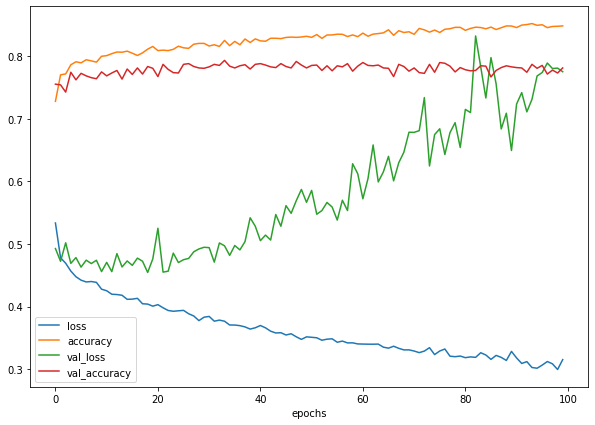

In [107]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

In [108]:
model_0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               3300      
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 13,501
Trainable params: 13,501
Non-trainable params: 0
_________________________________________________________________


In [109]:
model_0.evaluate(X_val, y_val)

55/55 [==============================] - 0s 2ms/step - loss: 0.7748 - accuracy: 0.7809


[0.7748492956161499, 0.7809085845947266]

55/55 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.7752
[0.5346521139144897, 0.7751581072807312]

In [93]:
#test_preds = model_0.predict(tf.constant(X_test, dtype=tf.float32)),
test_preds = model_0.predict(X_test)

134/134 [==============================] - 0s 1ms/step


In [94]:
df_preds = pd.DataFrame()
df_preds['PassengerId']=test_pass_id
df_preds['Transported']=test_preds.astype('bool')
print(df_preds.head())

  PassengerId  Transported
0     0013_01         True
1     0018_01         True
2     0019_01         True
3     0021_01         True
4     0023_01         True


True    4277
Name: Transported, dtype: int64

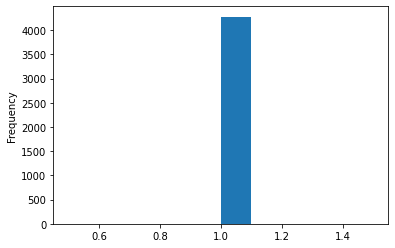

In [95]:
df_preds.Transported.astype('float').plot(kind='hist');
list(df_preds.Transported.unique())
df_preds.groupby('Transported').nunique()
df_preds.Transported.value_counts()

In [96]:
# # Export prediction data to csv
# df_preds.to_csv('Submission_try.csv', index = False)